# Impeller Stress and Frequency Prediction

## Polynominal Linear Regression

<h2 style="color:cyan">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

<h2 style="color:cyan">Read Data</h2>

In [2]:
filename_train = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20stress%20and%20freq%2086131.csv'
filename_test = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20test%20data%2086131.csv'
# filename_eva = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20evaluation%20data.csv'

df = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)
# df_eva = pd.read_csv(filename_eva)

<h2 style="color:cyan">Data Exploring</h2>

In [3]:
df_test.head()

,No,Model,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,1,86131,3550,7850,200,525,120,4.5,3.2,0,3.2,0,100.90,111.10,98.80,0,165.10,153.19
1,2,86131,3550,7850,200,525,120,6.0,3.2,0,3.2,0,52.90,114.50,99.50,0,174.93,163.73
2,3,86131,3550,7850,200,525,120,6.0,4.5,0,3.2,0,53.59,94.25,101.00,0,171.01,159.96
3,4,86131,3550,7850,200,625,160,4.5,3.2,0,3.2,0,83.13,140.85,91.91,0,152.90,139.19
4,5,86131,3550,7850,200,625,160,6.0,3.2,0,3.2,0,81.30,147.10,97.50,0,160.37,147.48


In [4]:
print(df.shape)
print(df_test.shape)
#print(df_eva.shape)

(210, 18)
(45, 18)


In [5]:
df.describe()

,No,Model,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
count,210.000000,210.0,210.0,210.0,210.0,210.000000,210.000000,210.000000,210.000000,210.0,210.000000,210.0,210.000000,210.000000,210.000000,210.0,210.000000,210.000000
mean,105.500000,86131.0,3550.0,7850.0,200.0,1000.000000,346.190476,7.948095,5.537619,0.0,4.311905,0.0,238.374000,348.087619,438.609952,0.0,112.243857,91.726857
std,60.765944,0.0,0.0,0.0,0.0,303.488489,182.368159,3.162508,2.522561,0.0,1.547061,0.0,134.009466,197.377051,295.563061,0.0,26.841942,31.884822
min,1.000000,86131.0,3550.0,7850.0,200.0,500.000000,120.000000,3.200000,3.200000,0.0,3.200000,0.0,44.140000,73.100000,66.200000,0.0,80.110000,48.240000
25%,53.250000,86131.0,3550.0,7850.0,200.0,750.000000,200.000000,6.000000,3.200000,0.0,3.200000,0.0,127.875000,178.950000,163.750000,0.0,93.845000,68.655000
50%,105.500000,86131.0,3550.0,7850.0,200.0,1000.000000,280.000000,6.000000,4.500000,0.0,3.200000,0.0,217.640000,308.250000,384.000000,0.0,103.900000,83.185000
75%,157.750000,86131.0,3550.0,7850.0,200.0,1250.000000,510.000000,9.000000,6.000000,0.0,4.500000,0.0,326.350000,480.500000,681.250000,0.0,122.390000,104.837500
max,210.000000,86131.0,3550.0,7850.0,200.0,1500.000000,660.000000,18.000000,15.000000,0.0,12.000000,0.0,740.800000,1055.200000,1253.000000,0.0,215.700000,206.700000


<h2 style="color:cyan">Drop unused column</h2>

In [6]:
df.drop(['No', 'Model'], axis=1, inplace=True)
df_test.drop(['No', 'Model'], axis=1, inplace=True)
#df_eva.drop(['No', 'Model', 'Vane max stress loc'], axis=1, inplace=True)

# fill NA with 0
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)
#df_eva.fillna(0, inplace=True)

In [7]:
df.head()

,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,3550,7850,200,500,120,4.5,3.2,0,3.2,0,83.10,103.3,82.2,0,188.7,178.40
1,3550,7850,200,500,120,6.0,3.2,0,3.2,0,48.20,105.3,88.0,0,198.3,188.50
2,3550,7850,200,500,120,9.0,3.2,0,3.2,0,44.14,108.7,91.8,0,215.7,206.70
3,3550,7850,200,500,120,4.5,4.5,0,3.2,0,85.82,86.5,89.0,0,183.8,173.40
4,3550,7850,200,500,120,4.5,6.0,0,3.2,0,88.30,73.1,89.5,0,177.1,166.67


<h2 style="color:cyan">Check correlation between columns</h2>

In [8]:
df.corr()

,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MatDensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MatYoung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2,NaN,NaN,NaN,1.000000,0.975150,0.695107,0.693609,NaN,0.574806,NaN,0.907802,0.899558,0.866908,NaN,-0.783476,-0.802783
DB,NaN,NaN,NaN,0.975150,1.000000,0.712745,0.725243,NaN,0.615650,NaN,0.905747,0.894695,0.854834,NaN,-0.688353,-0.715175
tm,NaN,NaN,NaN,0.695107,0.712745,1.000000,0.530329,NaN,0.429924,NaN,0.606262,0.638365,0.594162,NaN,-0.388280,-0.404290
ts,NaN,NaN,NaN,0.693609,0.725243,0.530329,1.000000,NaN,0.528627,NaN,0.714466,0.545155,0.740003,NaN,-0.471948,-0.477136
ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tv,NaN,NaN,NaN,0.574806,0.615650,0.429924,0.528627,NaN,1.000000,NaN,0.760659,0.810028,0.271106,NaN,-0.281644,-0.297912
Rib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Remove speed for impeller stress prediction data - speed effect will be estimated separately
df_clean = df.loc[df['Speed'] == 3550].loc[df['MatDensity'] == 7850].loc[df['MatYoung'] == 200]
df_clean_test = df_test.loc[df_test['Speed'] == 3550].loc[df_test['MatDensity'] == 7850].loc[df_test['MatYoung'] == 200]
#df_clean_eva = df_eva.loc[df_eva['Speed'] == 1785].loc[df_eva['MatDensity'] == 7850].loc[df_eva['MatYoung'] == 205].loc[df_eva['hasMouthRing'] == 0].loc[df_eva['isStraightSide'] == 0].loc[df_eva['hasRimout'] == 0].loc[df_eva['hasRimIn'] == 0].loc[df_eva['hasVaneRimOut'] == 0]

df_clean.drop(['Speed', 'MatDensity', 'MatYoung', 'Rib'], axis=1, inplace=True)
df_clean_test.drop(['Speed', 'MatDensity', 'MatYoung', 'Rib'], axis=1, inplace=True)
#df_clean_eva.drop(['Speed', 'MatDensity', 'MatYoung', 'ti', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)

# Scale D2 and DB
df_clean['D2'] = df_clean['D2'] / 1000
df_clean['DB'] = df_clean['DB'] / 1000
df_clean_test['D2'] = df_clean_test['D2'] / 1000
df_clean_test['DB'] = df_clean_test['DB'] / 1000
#df_clean_eva['D2'] = df_clean_eva['D2'] / 1000
#df_clean_eva['DB'] = df_clean_eva['DB'] / 1000

# stress dataframe
df_stress = df_clean.loc[df_clean['Sm'] != 0].loc[df_clean['Ss'] != 0].loc[df_clean['Sv'] != 0]
df_stress_test = df_clean_test.loc[df_clean_test['Sm'] != 0].loc[df_clean_test['Ss'] != 0].loc[df_clean_test['Sv'] != 0]
#df_stress_eva = df_clean_eva.loc[df_clean_eva['Sm'] != 0].loc[df_clean_eva['Ss'] != 0].loc[df_clean_eva['Sv'] != 0]

# frequency dataframe
df_frequency = df_clean.loc[df_clean['Frequency'] != 0].loc[df_clean['Frequency0'] != 0]
df_frequency_test = df_clean_test.loc[df_clean_test['Frequency'] != 0].loc[df_clean_test['Frequency0'] != 0]
#df_frequency_eva = df_clean_eva.loc[df_clean_eva['Rib'] == 2].loc[df_clean_eva['Frequency'] != 0].loc[df_clean_eva['Frequency0'] != 0]

print(df_stress.shape)
print(df_stress_test.shape)
#print(df_stress_eva.shape)


(210, 12)
(45, 12)


In [34]:
df_stress.head()

,D2,DB,tm,ts,ti,tv,Sm,Ss,Sv,Si,Frequency,Frequency0
0,0.5,0.12,4.5,3.2,0,3.2,83.10,103.3,82.2,0,188.7,178.40
1,0.5,0.12,6.0,3.2,0,3.2,48.20,105.3,88.0,0,198.3,188.50
2,0.5,0.12,9.0,3.2,0,3.2,44.14,108.7,91.8,0,215.7,206.70
3,0.5,0.12,4.5,4.5,0,3.2,85.82,86.5,89.0,0,183.8,173.40
4,0.5,0.12,4.5,6.0,0,3.2,88.30,73.1,89.5,0,177.1,166.67


In [35]:
df_frequency.head()

,D2,DB,tm,ts,ti,tv,Sm,Ss,Sv,Si,Frequency,Frequency0
0,0.5,0.12,4.5,3.2,0,3.2,83.10,103.3,82.2,0,188.7,178.40
1,0.5,0.12,6.0,3.2,0,3.2,48.20,105.3,88.0,0,198.3,188.50
2,0.5,0.12,9.0,3.2,0,3.2,44.14,108.7,91.8,0,215.7,206.70
3,0.5,0.12,4.5,4.5,0,3.2,85.82,86.5,89.0,0,183.8,173.40
4,0.5,0.12,4.5,6.0,0,3.2,88.30,73.1,89.5,0,177.1,166.67


In [36]:
df_stress_test.head()

,D2,DB,tm,ts,ti,tv,Sm,Ss,Sv,Si,Frequency,Frequency0
0,0.525,0.12,4.5,3.2,0,3.2,100.90,111.10,98.80,0,165.10,153.19
1,0.525,0.12,6.0,3.2,0,3.2,52.90,114.50,99.50,0,174.93,163.73
2,0.525,0.12,6.0,4.5,0,3.2,53.59,94.25,101.00,0,171.01,159.96
3,0.625,0.16,4.5,3.2,0,3.2,83.13,140.85,91.91,0,152.90,139.19
4,0.625,0.16,6.0,3.2,0,3.2,81.30,147.10,97.50,0,160.37,147.48


<h2 style="color:cyan">Data exploratory analysis</h2>

In [50]:
# Input parameters for stress
x_train_stress = df_stress[['D2','tm','ts','tv', 'ti']]
x_test_stress = df_stress_test[['D2','tm','ts','tv', 'ti']]
#x_eva_stress =  df_stress_eva[['D2','DB','tm','ts','tv','Rib']]

x_train_stress.head()

,D2,tm,ts,tv,ti
0,0.5,4.5,3.2,3.2,0
1,0.5,6.0,3.2,3.2,0
2,0.5,9.0,3.2,3.2,0
3,0.5,4.5,4.5,3.2,0
4,0.5,4.5,6.0,3.2,0


In [38]:
# Input parameters for frequency
x_train_frequency = df_frequency[['D2','tm','ts','tv','DB']]
x_test_frequency = df_frequency_test[['D2','tm','ts','tv', 'DB']]
#x_eva_frequency = df_frequency_eva[['D2','tm','ts','tv', 'DB']]

x_test_frequency.head()

,D2,tm,ts,tv,DB
0,0.525,4.5,3.2,3.2,0.12
1,0.525,6.0,3.2,3.2,0.12
2,0.525,6.0,4.5,3.2,0.12
3,0.625,4.5,3.2,3.2,0.16
4,0.625,6.0,3.2,3.2,0.16


In [39]:
# Output parameters for stress
ym_train_stress = df_stress[['Sm','Ss','Sv','Si']]
ym_test_stress = df_stress_test[['Sm','Ss','Sv','Si']]
#ym_eva_stress = df_stress_eva[['Sm','Ss','Sv','Si']]
ym_test_stress.head()
#ym_train_stress.head()

,Sm,Ss,Sv,Si
0,100.90,111.10,98.80,0
1,52.90,114.50,99.50,0
2,53.59,94.25,101.00,0
3,83.13,140.85,91.91,0
4,81.30,147.10,97.50,0


In [40]:
# Output parameters for frequency
ym_train_frequency = df_frequency[['Frequency','Frequency0']]
ym_test_frequency = df_frequency_test[['Frequency','Frequency0']]
#ym_eva_frequency = df_frequency_eva[['Frequency','Frequency0']]
ym_train_frequency.head()

,Frequency,Frequency0
0,188.7,178.40
1,198.3,188.50
2,215.7,206.70
3,183.8,173.40
4,177.1,166.67


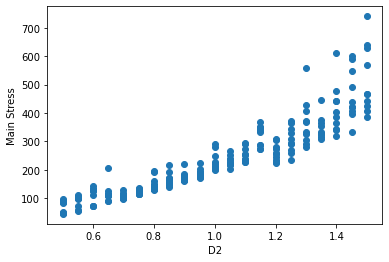

In [41]:
# plot main stress Vs impeller D2
plt.scatter(x_train_stress.D2, ym_train_stress.Sm)
plt.xlabel('D2')
plt.ylabel('Main Stress')
plt.show()

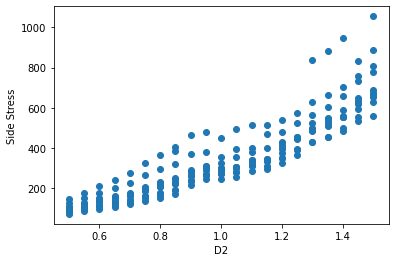

In [42]:
# plot side stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Ss)
plt.xlabel('D2')
plt.ylabel('Side Stress')
plt.show()

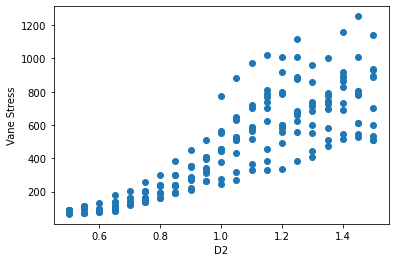

In [43]:
# plot vane stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Sv)
plt.xlabel('D2')
plt.ylabel('Vane Stress')
plt.show()

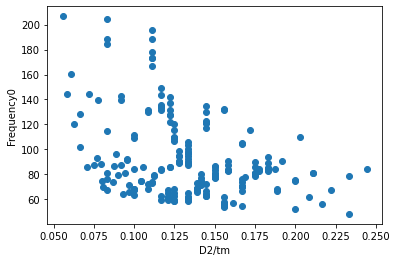

In [44]:
# plot frequency Vs D2/tm
plt.scatter(x_train_frequency.D2/x_train_frequency.tm,ym_train_frequency.Frequency0)
plt.xlabel('D2/tm')
plt.ylabel('Frequency0')
plt.show()

<h2 style="color:cyan">Function for Polynominal Regression</h2>

In [45]:
df_coef = pd.DataFrame()  # To save coefficients of fitting function

def polyEstimate(x_train_sm, y_train_sm, x_test_sm, y_test_sm, order=2 ,output=1, print_test = 0): 

    # Transform input data into polynominal features
    x_train_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_train_sm)
    x_train_sm_transform.shape  # 1, x, y, x2, xy, y2
    x_test_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_test_sm)

    # Create a linear regression model
    poly = LinearRegression()
    poly.fit(x_train_sm_transform, y_train_sm)  # transformed x data can be used as a linear regression model

    # Predict value of train data
    yhat_sm = poly.predict(x_train_sm_transform)
    yhat_test_sm = poly.predict(x_test_sm_transform)

    # Plot predict and true data
    df_result = pd.DataFrame(list(zip(y_train_sm,yhat_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig = px.scatter(df_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Train data')
        fig.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig.show()

    # Plot predict and true data
    df_test_result = pd.DataFrame(list(zip(y_test_sm,yhat_test_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig2 = px.scatter(df_test_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Test data')
        fig2.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig2.show()

    if (print_test==1):
        print(df_test_result)

    # Model Evaluation
    if (output==1):
        print("Residual sum of squares for train (MSE): %.2f" % np.mean((y_train_sm - yhat_sm) ** 2))
        print("R2-score for train: %.2f" % r2_score(y_train_sm , yhat_sm))

        print("Residual sum of squares for test (MSE): %.2f" % np.mean((y_test_sm - yhat_test_sm) ** 2))
        print("R2-score for test: %.2f" % r2_score(y_test_sm , yhat_test_sm))

        # Extract the coefficient
        columns_name = (PolynomialFeatures(degree=order).fit(x_train_sm).get_feature_names(x_train_sm.columns))
        columns_name = columns_name[1:]
        columns_name.append("Intercept")

        data = poly.coef_[1:]
        data = np.append(data, poly.intercept_).reshape(1,data.shape[0]+1)

        df_coef = pd.DataFrame(data, columns=columns_name)
        df_coef.to_clipboard()
        print('Coefficent shape:', df_coef.shape)
        return yhat_sm, yhat_test_sm
    else:
        return r2_score(y_train_sm, yhat_sm), r2_score(y_test_sm, yhat_test_sm)     

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Main Stress</h2>

In [51]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sm, x_test_stress, ym_test_stress.Sm, print_test=1)

    True_Value  Predict_Value
0       100.90      75.981856
1        52.90      71.235530
2        53.59      79.274514
3        83.13     100.841554
4        81.30      95.083661
5        82.90      95.083661
6       102.70     121.720457
7       138.60     117.868852
8       140.40     116.580491
9       128.20     151.145921
10      192.60     145.271180
11      197.60     147.081919
12      158.00     166.904403
13      197.10     160.018094
14      202.60     163.378383
15      169.90     183.360052
16      231.70     175.462175
17      238.70     180.372014
18      185.67     204.275561
19      227.20     191.863715
20      225.80     198.062811
21      211.30     221.650400
22      296.00     208.226986
23      303.90     220.600438
24      234.50     239.722405
25      225.00     225.287424
26      230.70     239.137326
27      250.80     258.491577
28      247.00     255.318204
29      256.10     291.316199
30      283.80     278.302604
31      248.50     262.692684
32      28

(array([ 70.20266059,  65.70922717,  66.40967729,  80.23041641,
         91.41444436,  65.06150339,  72.39282885,  73.98578278,
         80.23041641,  68.97728485,  81.93534286,  76.93612547,
         76.62500766,  91.4879553 , 102.12374089,  78.81887905,
         88.48638919,  84.7375377 ,  91.4879553 ,  88.87998562,
         94.36519184,  88.86019048,  87.53750475, 103.44266091,
        113.53020414,  93.27342142, 105.27711625,  96.18645934,
        103.44266091, 101.74818071, 107.49220754, 101.48142222,
         99.14716856, 116.09453324, 125.63383412, 108.42513052,
        122.76501003, 108.33254771, 116.09453324, 115.31354251,
        114.79982068, 111.45399909, 121.02460013, 121.31638997,
        121.17580279, 128.14624569, 113.74394031, 125.78904672,
        121.17580279, 129.44357228, 128.81538586, 124.45799634,
        133.01702945, 135.83773911, 134.71622459, 141.13842513,
        129.78419888, 144.16548997, 134.71622459, 143.48977805,
        143.52811776, 138.1591603 , 145.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Side stress</h2>

In [52]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Ss, x_test_stress, ym_test_stress.Ss, print_test=1)

    True_Value  Predict_Value
0       111.10     105.694070
1       114.50     110.920510
2        94.25      91.187098
3       140.85     144.530928
4       147.10     149.229894
5       122.80     149.229894
6       184.40     191.751818
7       189.50     195.607566
8       210.40     218.427692
9       232.90     238.486284
10      244.20     241.287082
11      275.50     268.908573
12      253.20     263.433219
13      267.40     265.706543
14      304.20     295.728717
15      270.50     289.433290
16      290.50     291.179139
17      326.20     323.601996
18      255.70     275.801481
19      264.00     278.764832
20      369.80     352.528410
21      288.00     301.579867
22      285.00     304.015743
23      331.50     335.095465
24      358.60     328.411387
25      353.90     330.319789
26      360.30     363.442047
27      394.10     356.296043
28      465.10     445.626464
29      501.80     481.003558
30      392.60     423.294616
31      403.30     427.445692
32      43

(array([  96.64306497,  102.00137356,  108.23075764,   77.20114285,
          67.55884669,  125.49192472,  159.98329626,   83.43193976,
          77.20114285,  105.00628345,  115.00835891,  120.10293015,
         125.80483952,   93.23848085,   80.91008168,  148.58585736,
         188.5333505 ,   99.20554041,   93.23848085,  109.38317284,
         134.42678808,  139.25762197,  144.43205664,  110.32895409,
          95.31445192,  172.73292525,  218.13653997,  116.0322763 ,
         110.32895409,  129.03017438,  154.8983525 ,  159.46544904,
         164.112409  ,  128.47256257,  110.7719574 ,  197.93312837,
         248.79286469,  133.91214743,  128.47256257,  149.73031117,
         180.72641134,  184.84589661,  182.9824044 ,  176.42305216,
         152.8451538 ,  133.46516292,  232.12340912,  292.63186301,
         152.8451538 ,  147.6693063 ,  203.04050889,  206.63251945,
         204.24155255,  199.00088706,  172.83129542,  150.76520153,
         259.16614537,  325.13072086,  172.83129

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Vane stress</h2>

In [53]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sv, x_test_stress, ym_test_stress.Sv, print_test=1)

    True_Value  Predict_Value
0        98.80      60.357568
1        99.50      61.287762
2       101.00      73.570872
3        91.91     103.770693
4        97.50     104.058663
5       119.20     104.058663
6       145.90     161.244474
7       145.30     160.075748
8       113.60      93.210741
9       222.00     232.845196
10      221.50     230.392021
11      150.80     149.607267
12      255.80     274.051147
13      256.40     270.955748
14      181.40     183.211121
15      300.90     318.860827
16      301.30     315.123203
17      213.30     220.418703
18      422.10     430.732874
19      422.10     429.472342
20      242.90     261.230013
21      484.20     488.436178
22      484.90     486.533422
23      333.70     356.983828
24      564.60     549.743210
25      566.20     547.198230
26      397.20     411.563557
27      619.70     614.653969
28      357.50     405.286307
29      295.90     296.859113
30      556.80     531.534200
31      575.20     530.867165
32      43

(array([  51.75661598,   52.84736618,   54.56864959,   59.63698327,
          83.05769213,   43.57458774,  152.65127972,   62.28739192,
          59.63698327,   14.00566629,   69.85945123,   70.62908924,
          71.70814828,   83.42598841,  113.40766252,   49.03138001,
         143.51648393,   85.75528487,   83.42598841,   69.06834349,
          91.56601401,   92.01453983,   92.45137449,  110.81872107,
         147.36136044,   58.0918998 ,  137.98541567,  112.82690534,
         110.81872107,   91.05320349,  116.8763043 ,  117.00371794,
         116.79832823,  141.81518125,  184.91878587,   70.75614711,
         136.05807493,  143.50225334,  141.81518125,  116.64179102,
         145.59662356,  144.74900948,  143.28777276,  145.79032212,
         177.78132886,  229.24550464,   86.91882565,  137.73116802,
         177.78132886,  176.41536895,  177.79325672,  176.30341826,
         174.19995716,  178.30806746,  215.66413189,  273.68927294,
         106.46941582,  142.69017013,  215.66413

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Frequency</h2>

In [49]:
# All parameters
polyEstimate(x_train_frequency, ym_train_frequency.Frequency0, x_test_frequency, ym_test_frequency.Frequency0, order=2)

Residual sum of squares for train (MSE): 49.26
R2-score for train: 0.95
Residual sum of squares for test (MSE): 27.67
R2-score for test: 0.97
Coefficent shape: (1, 21)


(array([175.24121645, 184.58915075, 201.83754024, 169.48498244,
        162.64553451, 181.95637841, 189.36573155, 179.08529039,
        169.48498244, 186.41965423, 142.33999013, 150.46968794,
        165.28160447, 137.01407059, 130.67113935, 147.76244967,
        153.6802231 , 145.39614206, 137.01407059, 134.90396878,
        113.52824907, 120.43971039, 132.81515395, 108.63264398,
        102.78622944, 117.65800619, 122.08419991, 115.79647897,
        108.63264398, 107.14803266, 118.58342974, 125.42802949,
        137.66974989, 114.06272085, 108.64887883, 122.89199127,
        127.52449776, 121.15969426, 114.06272085, 112.26116003,
        128.29219523, 140.40019249, 150.57821761, 121.51445706,
        124.3987562 , 119.70868709, 134.12995787, 140.52692717,
        124.3987562 , 117.36864436, 106.00371492, 115.67523921,
        123.41679136, 100.44421323, 102.54059035,  98.34703793,
        110.54877514, 115.45416473, 102.54059035,  96.728715  ,
         87.80471986,  95.03977118, 100.